# 혼공 분류

In [5]:
# 데이터 가져오기
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터 합치기
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
fish_data = list(zip(length,weight))

#정답
fish_target = [1]*35 + [0]*14

In [9]:
# 학습
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data,fish_target)
kn.score(fish_data,fish_target)

1.0

In [10]:
# 예측
kn.predict([(30,600)] )

array([1])

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(fish_data,columns=['length','weight'])
df['target'] = fish_target
df.head()

,length,weight,target
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


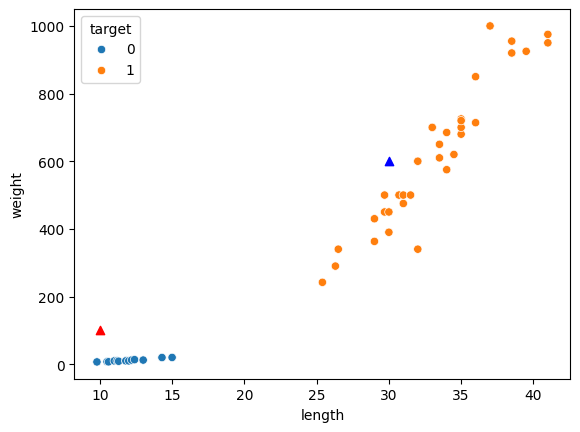

In [24]:
sns.scatterplot(data=df, x='length', y='weight',hue = 'target')
plt.scatter(x=30,y=600,color='blue',marker='^')
plt.scatter(x=10,y=100,color='red',marker='^')

In [27]:
kn.predict([(30,600),(10,100)])

array([1, 0])

In [31]:
# 파라메터의 n_neighbor의 값에 따른 성능변화
# n_neighbor의 개수를 전체데이터로 한다면?
kn = KNeighborsClassifier(n_neighbors=49)
kn.fit(fish_data, fish_target)
# 성능
print(kn.score(fish_data, fish_target))
print(f"전체데이터중에 35개만 맞출 확률 : {35/49}")
print(f"전체데이터를 예측데이터로 넣으면 모델이 예측한 정답은 : {kn.predict(fish_data)}")
print("무조건 클래스 1만 예측했음")

0.7142857142857143
전체데이터중에 35개만 맞출 확률 : 0.7142857142857143
전체데이터를 예측데이터로 넣으면 모델이 예측한 정답은 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
무조건 클래스 1만 예측했음


### 올바른 데이터 분류

In [32]:
# 현재 주어진 데이터는 처음부터 35개는 클래스 1이고 나머지 14개는 클래스 0의 데이터
x_train = fish_data[:35]
x_test = fish_data[35:]
y_train = fish_target[:35]
y_test = fish_target[35:]

In [33]:
# 학습
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)  # 학습데이터에는 클래스 0에 대한 학습데이터가 없다

0.0

In [34]:
# 데이터를 섞는다...
# target의 비율대로 섞어준다... 
# target의 비율이 다른현상을 셈플링 편향

In [50]:
import random
temp = list(zip(fish_data,fish_target))
random.shuffle(temp)
data,target =[],[]
for a,b in temp:
    data.append(a)
    target.append(b)
x_train = data[:35]
y_train = target[:35]   
x_test = data[35:]
y_test = target[35:]

In [51]:
# 데이터 섞고 난후 학습
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

1.0

In [64]:
# 셈플링 편향
pd.DataFrame(fish_target).value_counts()

0
1    35
0    14
Name: count, dtype: int64

In [68]:
# 넘파이를 이용해서 데이터 섞기 - 인덱스 이용
import numpy as np
a = [1,2,3,4,5]
a = np.array(a)
a[[1,3]]

array([2, 4])

In [84]:
indexs = list(range(len(fish_data))) # 0~ 48 순차인덱스
random.shuffle( indexs ) # 인덱스 자체를 섞음

# 섞인 인덱스의 :35 까지의 인덱스에 해당하는 일부데이터를 추출 --> 넘파이만 가능
x_train, y_train = np.array(fish_data)[indexs[:35]], np.array(fish_target)[indexs[:35]]
x_test, y_test = np.array(fish_data)[indexs[35:]], np.array(fish_target)[indexs[35:]]

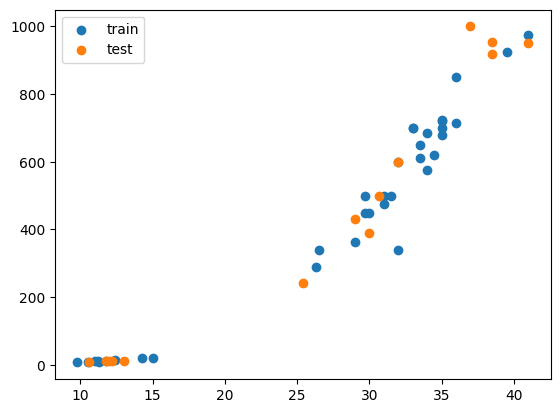

In [94]:
# 시각화를 통해 잘 섞여있는지 확인
plt.scatter(x_train[:,0],x_train[:,1],label='train')
plt.scatter(x_test[:,0],x_test[:,1],label='test')
plt.legend()
plt.show()

In [96]:
# 데이터는 셈플링 편향 없이 클래스들이 잘 섞어서 학습을 해야.. 여러 특성을 골고루 반영한다.
# 데이터를 섞는 이유

In [98]:
# 데이터 --> 넘파이
fish_data = np.array(fish_data)
fish_target = np.array(fish_target)
fish_data,fish_target

(array([[  25.4,  242. ],
        [  26.3,  290. ],
        [  26.5,  340. ],
        [  29. ,  363. ],
        [  29. ,  430. ],
        [  29.7,  450. ],
        [  29.7,  500. ],
        [  30. ,  390. ],
        [  30. ,  450. ],
        [  30.7,  500. ],
        [  31. ,  475. ],
        [  31. ,  500. ],
        [  31.5,  500. ],
        [  32. ,  340. ],
        [  32. ,  600. ],
        [  32. ,  600. ],
        [  33. ,  700. ],
        [  33. ,  700. ],
        [  33.5,  610. ],
        [  33.5,  650. ],
        [  34. ,  575. ],
        [  34. ,  685. ],
        [  34.5,  620. ],
        [  35. ,  680. ],
        [  35. ,  700. ],
        [  35. ,  725. ],
        [  35. ,  720. ],
        [  36. ,  714. ],
        [  36. ,  850. ],
        [  37. , 1000. ],
        [  38.5,  920. ],
        [  38.5,  955. ],
        [  39.5,  925. ],
        [  41. ,  975. ],
        [  41. ,  950. ],
        [   9.8,    6.7],
        [  10.5,    7.5],
        [  10.6,    7. ],
        [  1

In [100]:
# 사이킷런의 데이터 분류
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(fish_data,fish_target,test_size=0.2, stratify=fish_target)

In [102]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [121]:
distance,index = model.kneighbors([(25,150)])
x_train[index][0]

array([[ 25.4, 242. ],
       [ 13. ,  12.2],
       [ 12.2,  12.2],
       [ 11.8,  10. ],
       [ 11.8,   9.9]])

array([0])

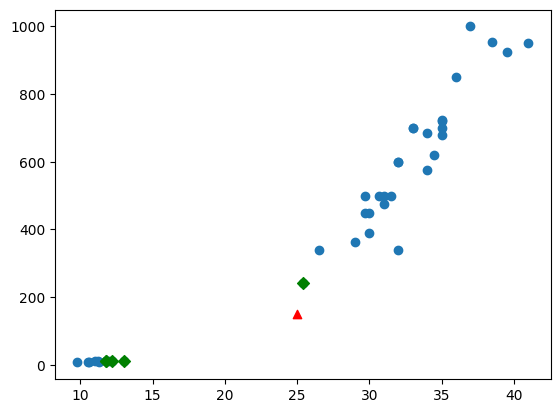

In [123]:
# (25,150) --> 클래스? 0? 1?
plt.scatter(x =x_train[:,0], y=x_train[:,1])
plt.scatter(x=25,y=150, marker='^',c='red')
# 이웃한 5개의 실제 데이터
plt.scatter(x_train[index][0][:,0],x_train[index][0][:,1],marker='D',c='green')
model.predict([(25,150)])

In [124]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

In [145]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
model = KNeighborsClassifier()
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)
sample = ss.transform( np.array([(25,150)]) )
model.predict(sample)

array([1])

In [150]:
distance,index = model.kneighbors(sample)
index

array([[21,  2, 17, 30, 18]])

array([1])

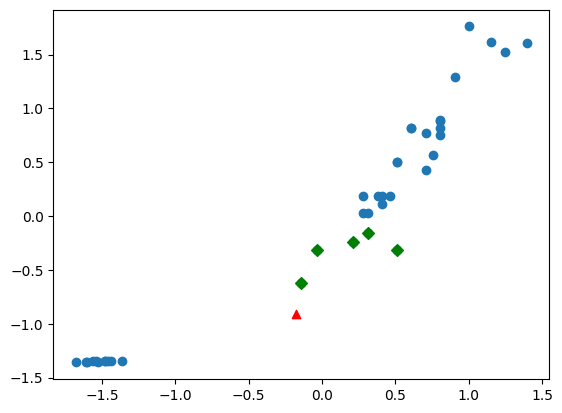

In [151]:
# 시각화를 통한 확인
plt.scatter(x =x_train_scaled[:,0], y=x_train_scaled[:,1])
plt.scatter(x=sample[:,0],y=sample[:,1], marker='^',c='red')
# # 이웃한 5개의 실제 데이터
plt.scatter(x_train_scaled[index][0][:,0],x_train_scaled[index][0][:,1],marker='D',c='green')
model.predict(sample)

In [152]:
# titanic 데이터 가져오기
# 전처리
    #  결측치, 이상치, 피처엔지니어링(적합한 피처선택), 표준화
# 모델선택  KNN
# 학습
# 평가 confusion metrix

In [154]:
titanic = sns.load_dataset('titanic')
model = KNeighborsClassifier()

In [157]:
titanic.head()
drop_cols = ['fare','embark_town','class','who','deck','alive']
df = titanic.drop(columns=drop_cols)
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,adult_male,alone
0,0,3,male,22.0,1,0,S,True,False
1,1,1,female,38.0,1,0,C,False,False
2,1,3,female,26.0,0,0,S,False,True
3,1,1,female,35.0,1,0,S,False,False
4,0,3,male,35.0,0,0,S,True,True


In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])
df['adult_male'] = le.fit_transform(df['adult_male'])
df['alone'] = le.fit_transform(df['alone'])

# 나이에 대한 결측치는 선실등급별 성별 평균으로 fillna
groupded = df.groupby(['pclass','sex'])
groupded['age'].transform('mean')
df['age'] = df['age'].fillna(groupded['age'].transform('mean'))

df.isna().sum()


survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
embarked      0
adult_male    0
alone         0
dtype: int64

In [167]:
# 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = df.drop(columns='survived')
y = df['survived']
X_scaled = ss.fit_transform(X)
x_train,x_test,y_train,y_test  = train_test_split(X_scaled,y,stratify=y, random_state=42)

In [169]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [171]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, model.predict(x_test))

array([[118,  19],
       [ 33,  53]])

In [173]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       137
           1       0.74      0.62      0.67        86

    accuracy                           0.77       223
   macro avg       0.76      0.74      0.75       223
weighted avg       0.76      0.77      0.76       223



In [270]:
# 성능 개선
df = sns.load_dataset('titanic')
drop_cols = ['fare','embark_town','class','who','deck','alive']
df = titanic.drop(columns=drop_cols)
# pclass 1 2 3 --> 3:0  2:1 1:3 
# embarked : 순서가 있는 라벨링 or onehot
# sex, adult_male,alone : 라벨인코딩
def imsi(x):
    if x == 3:
        return 0
    elif x == 2:
        return 1
    elif x == 1:
        return 2
le = LabelEncoder()    
df['pclass'] = df['pclass'].apply(imsi)    
df['adult_male'] = le.fit_transform(df['adult_male'])
df['alone'] = le.fit_transform(df['alone'])
df['sex'] = le.fit_transform(df['sex'])
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna('S')
df['embarked'] = df['embarked'].fillna(df['age'].mean())
df = df.reset_index(drop=True)
df.isna().sum()
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,adult_male,alone
0,0,0,1,22.0,1,0,S,1,0
1,1,2,0,38.0,1,0,C,0,0
2,1,0,0,26.0,0,0,S,0,1
3,1,2,0,35.0,1,0,S,0,0
4,0,0,1,35.0,0,0,S,1,1


In [271]:
dummy_embarked = pd.get_dummies(df['embarked'],prefix='embarked').astype(int)
df = pd.concat( [df.drop(columns='embarked'), dummy_embarked],axis=1)
X = df.drop(columns='survived')
y = df['survived']
X_scaled = ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,stratify = y, random_state=100)
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print(classification_report(y_test, model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.87      0.86      0.86       137
           1       0.78      0.79      0.79        86

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.83       223
weighted avg       0.83      0.83      0.83       223



In [238]:
df = sns.load_dataset('titanic')
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

## 로지스틱 회귀 SVC

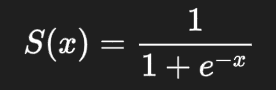

In [246]:
# 계단 함수
    # 입력데이터를 0 과 1로 만 출력
# 시그모이드 함수
    # 선형회귀 출력값을 0 ~ 1 사이로 변경 --> 확률로 해석
    # x는  y = wx +b
    # 클래스 1에 속할 확률이 p(x) = 0.8
    # 임계치가 존재... 임계치 이상이면 1 아니면 0  보통은 0.5
# 손실함수(로그손실)
    # log loss, cross entropy
    # 실제 값과 예측값의 차이를 나타내는 함수 -> 차이를 최소화 하는 방향으로 학습
    # 경사 하강법 - 최적화 : 손실함수의 값이 최소가 되는 방향을 찾아서 원래 가중치를 갱신
# 학습 횟수 : epoch
    # 에포크 : 전체데이터를 한번 사용해서 학습
# 학습률 : learning late
    # 한번에 경사를 내려가는 보폭의 크기


In [265]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1 + np.exp(-x))
# 이진분류 데이터 생성
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_features=4,n_classes=2,random_state=42)
print(X.shape, y.shape)
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

from sklearn.linear_model import LogisticRegression
model_logistic =  LogisticRegression(); model_knn = KNeighborsClassifier()
model_logistic.fit(x_train,y_train); model_knn.fit(x_train,y_train)

model_logistic.score(x_test,y_test), model_knn.score(x_test,y_test)


(100, 4) (100,)


(0.96, 0.96)

In [269]:
np.round(model_logistic.predict_proba(x_test),2)

array([[0.03, 0.97],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.96, 0.04],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.6 , 0.4 ],
       [0.99, 0.01],
       [0.8 , 0.2 ],
       [0.99, 0.01],
       [0.88, 0.12],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.06, 0.94]])

### 타이타닉 성능개선 모델의 데이터를 LogisticRegression에 적용

In [272]:
model_logistic = LogisticRegression()
model.fit(x_train,y_train)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       137
           1       0.78      0.79      0.79        86

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.83       223
weighted avg       0.83      0.83      0.83       223



In [273]:
# 적용
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [275]:
# KNN LOGISTIC  분류모델을 만들고 report 성능비교
X = iris.drop(columns='species')
y = iris['species']
knn = KNeighborsClassifier()
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)

In [277]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [280]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [281]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
print(classification_report(y_test, lg.predict(x_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [283]:
np.round(lg.predict_proba(x_test),2)

array([[0.99, 0.01, 0.  ],
       [0.01, 0.66, 0.33],
       [0.03, 0.92, 0.05],
       [0.02, 0.93, 0.04],
       [0.98, 0.02, 0.  ],
       [0.01, 0.74, 0.25],
       [0.  , 0.24, 0.76],
       [0.  , 0.12, 0.88],
       [0.  , 0.03, 0.97],
       [0.  , 0.04, 0.96],
       [0.01, 0.61, 0.38],
       [0.  , 0.03, 0.97],
       [0.03, 0.95, 0.02],
       [0.02, 0.75, 0.24],
       [0.95, 0.05, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.  , 0.76, 0.24],
       [0.98, 0.02, 0.  ],
       [0.02, 0.91, 0.07],
       [0.  , 0.17, 0.83],
       [0.15, 0.85, 0.  ],
       [0.  , 0.45, 0.55],
       [0.01, 0.81, 0.18],
       [0.  , 0.14, 0.86],
       [0.18, 0.82, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.  , 0.4 , 0.6 ],
       [0.97, 0.03, 0.  ],
       [0.  , 0.45, 0.55],
       [0.  , 0.08, 0.92],
       [0.  , 0.03, 0.97],
       [0.99, 0.01, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.  , 0.05, 0.95],
 

Cardiovascular Disease dataset(심혈과 진환 데이터셋)

In [315]:
cardio = pd.read_csv('C:\\pandas\\Cardiovascular Disease dataset\\cardio_train.csv', sep=';')
cardio.drop(columns=['id'], inplace=True)

In [316]:
# 탐색적 데이터 분석
    # 주로 시각화를 통해 데이터의 분포 형태 모양
# 데이터를 전처리
# 피처엔지니어링(적합한 피처 선택(논리적/도메인지식) or 파생피처 생성(도메인지식))
# 모델선택
# 학습
# 평가
# 모델 채택

In [317]:
# ▪ 나이
# ▪ 성별(1-women, 2-men)
# ▪ 키(cm)
# ▪ 몸무게(kg)
# ▪ ap_hi(systolic blood pressure, 수축혈압)
# ▪ ap_lo(diastolic blood pressure, 이완혈압)
# ▪ cholesterol(1-normal, 2-above normal, 3-well above normal)
# ▪ gluc(혈당)(1-normal, 2-above normal, 3-well above normal)
# ▪ smoke(0-비흡연, 1-흡연)
# ▪ alco(0-음주X, 1-음주O)
# ▪ active(운동여부)(0-X, 1-O)
# ▪ Cardio(target)(0-X, 1-O)

In [318]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [319]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


<Axes: xlabel='cardio', ylabel='count'>

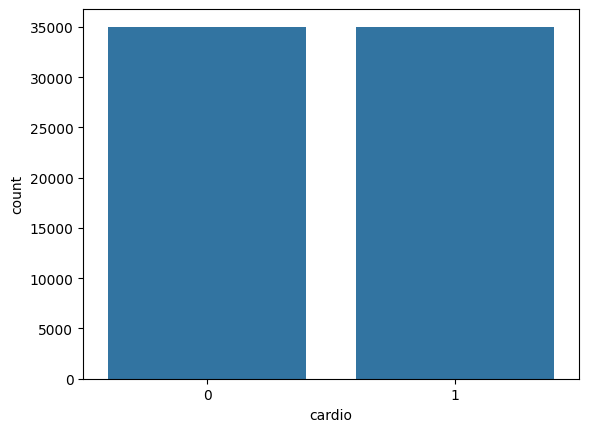

In [320]:
import seaborn as sns
sns.countplot(data=cardio,x='cardio')

<Axes: xlabel='height', ylabel='weight'>

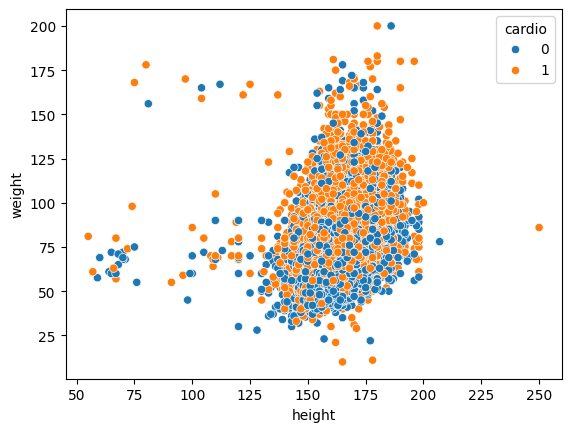

In [321]:
sns.scatterplot(data=cardio, x='height',y='weight',hue='cardio')

In [322]:
cardio = cardio.drop(columns=['height','weight','age'])

In [323]:
cardio.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,2,110,80,1,1,0,0,1,0
1,1,140,90,3,1,0,0,1,1
2,1,130,70,3,1,0,0,0,1
3,2,150,100,1,1,0,0,1,1
4,1,100,60,1,1,0,0,0,0


In [344]:
# sns.scatterplot(data=cardio,x='ap_hi',y='ap_lo',hue='cardio')
cardio['ap_hi'] = cardio['ap_hi'].apply(lambda x : np.nan if x<0 else x)

In [346]:
cardio.dropna(inplace=True)

In [354]:
bins = [0,120,140,160,180,float('inf')]
lables = [0,1,2,3,4]
cardio['ap_hi'] = pd.cut(cardio['ap_hi'],bins=bins, labels=lables)
cardio['ap_lo'] = pd.cut(cardio['ap_lo'],bins=bins, labels=lables)

In [360]:
cardio.reset_index(drop=True,inplace=True)

In [374]:
cardio['gender'] = cardio['gender'].replace({2:1,1:0})

In [376]:
X = cardio.drop(columns='cardio')
y = cardio['cardio']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [378]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
print(classification_report(y_test, lg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.62      0.00      0.00      8755
           1       0.50      1.00      0.67      8744

    accuracy                           0.50     17499
   macro avg       0.56      0.50      0.33     17499
weighted avg       0.56      0.50      0.33     17499



c:\Users\USER\miniconda3\envs\20240909\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\USER\miniconda3\envs\20240909\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [383]:
# cardio.drop(columns=['height','weight','age'])
# X, y 분류하고...  X 표준화
cardio = pd.read_csv('C:\\pandas\\Cardiovascular Disease dataset\\cardio_train.csv', sep=';')
cardio.drop(columns=['id','height','weight','age'],inplace=True)
X = cardio.drop(columns='cardio')
y  = cardio['cardio']
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
lg = LogisticRegression()
lg.fit(x_train,y_train)
print(classification_report(y_test, lg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      8755
           1       0.77      0.62      0.69      8745

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.71     17500
weighted avg       0.72      0.72      0.71     17500



c:\Users\USER\miniconda3\envs\20240909\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [395]:
# cardio.drop(columns=['height','weight','age'])
# X, y 분류하고...  X 표준화
cardio = pd.read_csv('C:\\pandas\\Cardiovascular Disease dataset\\cardio_train.csv', sep=';')
cardio['Bmi'] = round( cardio['weight'] / ((cardio['height'] / 100) ** 2) , 2)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Wightloss'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overwight'
    elif 30 <= bmi < 35:
        return 'Obesity class 1'
    elif 35<= bmi < 40:
        return 'Obesity class 2'
    else: 
        return 'Extreme Obesity'

# cardio['BMI_category'] = cardio['Bmi'].apply(categorize_bmi)
# cardio['BMI_category'] = le.fit_transform( cardio['BMI_category'])



# cardio['age_years'] = (cardio['age'] / 365).round().astype(int)
cardio.drop(columns=['id','height','weight','age'],inplace=True)
X = cardio.drop(columns='cardio')
y  = cardio['cardio']
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
lg = LogisticRegression()
lg.fit(x_train,y_train)
print(classification_report(y_test, lg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      8755
           1       0.76      0.65      0.70      8745

    accuracy                           0.72     17500
   macro avg       0.73      0.72      0.72     17500
weighted avg       0.73      0.72      0.72     17500



c:\Users\USER\miniconda3\envs\20240909\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [400]:
# cardio.drop(columns=['height','weight','age'])
# X, y 분류하고...  X 표준화
cardio = pd.read_csv('C:\\pandas\\Cardiovascular Disease dataset\\cardio_train.csv', sep=';')
cardio['Bmi'] = round( cardio['weight'] / ((cardio['height'] / 100) ** 2) , 2)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Wightloss'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overwight'
    elif 30 <= bmi < 35:
        return 'Obesity class 1'
    elif 35<= bmi < 40:
        return 'Obesity class 2'
    else: 
        return 'Extreme Obesity'

cardio['BMI_category'] = cardio['Bmi'].apply(categorize_bmi)
cardio['BMI_category'] = le.fit_transform( cardio['BMI_category'])



cardio['age_years'] = (cardio['age'] / 365).round().astype(int)
cardio.drop(columns=['id','height','weight','age','Bmi'],inplace=True)
X = cardio.drop(columns='cardio')
y  = cardio['cardio']
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
lg = KNeighborsClassifier()
lg.fit(x_train,y_train)
print(classification_report(y_test, lg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      8755
           1       0.71      0.68      0.69      8745

    accuracy                           0.70     17500
   macro avg       0.70      0.70      0.70     17500
weighted avg       0.70      0.70      0.70     17500



In [404]:
help(sns.load_dataset)

Help on function load_dataset in module seaborn.utils:

load_dataset(name, cache=True, data_home=None, **kws)
    Load an example dataset from the online repository (requires internet).

    This function provides quick access to a small number of example datasets
    that are useful for documenting seaborn or generating reproducible examples
    for bug reports. It is not necessary for normal usage.

    Note that some of the datasets have a small amount of preprocessing applied
    to define a proper ordering for categorical variables.

    Use :func:`get_dataset_names` to see a list of available datasets.

    Parameters
    ----------
    name : str
        Name of the dataset (``{name}.csv`` on
        https://github.com/mwaskom/seaborn-data).
    cache : boolean, optional
        If True, try to load from the local cache first, and save to the cache
        if a download is required.
    data_home : string, optional
        The directory in which to cache data; see :func:`get_dat

In [416]:
# 다이아모든 등급 예측 모델( 두개 모델 성능 비교)
df = sns.load_dataset('diamonds')
df['cut'].value_counts()

model = LogisticRegression(max_iter = 1000)  #  베이스모델
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()

df['color'] = oe.fit_transform(df['color'])
df['clarity'] = oe.fit_transform(df['clarity'])
X = df.drop(columns='cut')
y = df['cut']
X_scaled = ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,stratify=y,random_state=42)
model.fit(x_train,y_train)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

        Fair       0.80      0.49      0.61       402
        Good       0.56      0.13      0.21      1226
       Ideal       0.72      0.87      0.79      5388
     Premium       0.64      0.71      0.67      3448
   Very Good       0.51      0.45      0.47      3021

    accuracy                           0.66     13485
   macro avg       0.65      0.53      0.55     13485
weighted avg       0.64      0.66      0.63     13485

